Normalized APF Spectra Tutorial

By Malik Bossett

About this Tutorial

This tutorial is intended to show the progression towards creating reduced and normalized spectra. This tutorial will cover:
        - Creating a reduced spectrum
        - Identifying and plotting the H-alpha absorption feature from the reduced and full spectrum
        - Identifying and plotting the Sodium-D absorption feature from full and reduced spectra
        - Normalizing the raw spectra 

Important: This tutorial was created using some elements from Zoe Ko's tutorial on APF Data and Haynes Stephens's tutorial on Breakthrough Listen APF Data.
https://github.com/howardisaacson/APF-BL-DAP/blob/main/APFTutorial/APFtutorial-noregrid.ipynb
https://github.com/UCBerkeleySETI/breakthrough/blob/master/APF/Tutorial/.ipynb_checkpoints/

First we have to import the matplotlib, pandas, numpy, and os libraries. The matplotlib library is used for plotting data, including spectra. The pandas library is used for data manipulation, time series and numerical table manipulation.The numpy library helps with modifying arrays, which is how the data in our '.fits' file will be organized. The os library is used to interact with the operating system and allows working files, changing the environment variables, etc.

In [1]:
%matplotlib inline

In [2]:
from astropy.io import fits
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import os

In [3]:
cd/datag/blpd0/datax/apf

/datag/blpd0/datax/apf


Let's open the .fits file we want to create the reduced and normalized spectra for. 

In [4]:
apf_file = fits.open('ucb-aso211.fits')

The file also includes data on the object observed, the telescope that was used to observe it, and the date of the observation. We want to use a command to bring out the header and print its contents.

In [5]:
header = apf_file[0].header
print(repr(header))

SIMPLE  =                    T / NORMAL FITS IMAGE                              
BITPIX  =                   16 / DATA PRECISION                                 
NAXIS   =                    2 / NUMBER OF IMAGE DIMENSIONS                     
NAXIS1  =                 2080 / NUMBER OF COLUMNS                              
NAXIS2  =                 4608 / NUMBER OF ROWS                                 
CRVAL1U =                    0 / COLUMN ORIGIN                                  
CRVAL2U =                    0 / ROW ORIGIN                                     
CDELT1U =                    1 / COLUMN CHANGE PER PIXEL                        
CDELT2U =                    1 / ROW CHANGE PER PIXEL                           
OBSNUM  =                  211 / OBSERVATION NUMBER                             
IDNUM   =                    2 / IMAGE ID                                       
UGEOM   =                    1 / UCAM READOUT GEOMETRY                          
DGEOM   =                   

Though its not needed for the tutorial, we can also index the data with details such as Right Ascension, Declination, and the target object HIP3092(Delta Andromedae).

In [6]:
print("Right Ascension: " + header['RA'])
print("Declination: " + header['DEC'])
print("Target Object: " + header['TOBJECT'])

Right Ascension:  0:39:19.8
Declination:  30:51:38.0
Target Object: HIP3092


In order to show the image, we need to use a command to bring out the visual image that represents the .fits file. 

In [7]:
image = apf_file[0].data

Now to plot the data as an image we have to use the plt.imshow function.

Text(0.5, 1.0, '2D array data w/ contrast')

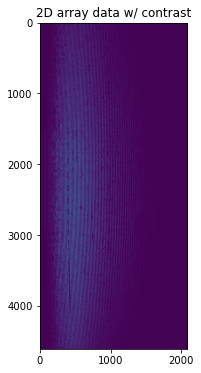

In [54]:
plt.imshow(image)
plt.title('2D array data w/ contrast')

Though the plot shows a bit of contrast, it doesn't show enough to tell the different pixels apart. We can use vmin and vmax to set a range of values. However values lower than the lowest boundary and values higher than the highest boundary will look the same. We also want to switch the positoning of the origin to the lower left. 

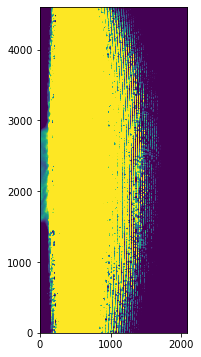

In [55]:
plt.imshow(image, vmin = np.median(image), vmax = np.median(image) * 1.2, origin = 'lower')

Before we move on to creating a reduced specturm, we can quickly plot the flux to wavelength ratio of the spectra from Delta Andromedae by using numpy. Using the sum function returns the sum of array elements over the specified axis which will be zero in this case. 

2080


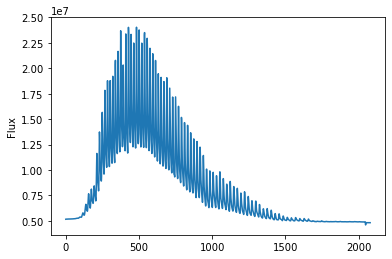

In [9]:
flux = np.sum(image, axis = 0)
plt.ylabel('Flux')
plt.plot(flux)

print(len(flux))

What we really want is a visual image of the reduced spectrum. First we need to rotate our array 90 degrees counter-clockwise and we can do that by using np.rot90. In order for the plot to be large enough to analyze, we can manually set the size by using plt.figure and figsize(). 

Text(0.5, 1.0, '2D array w/ contrast and rotated')

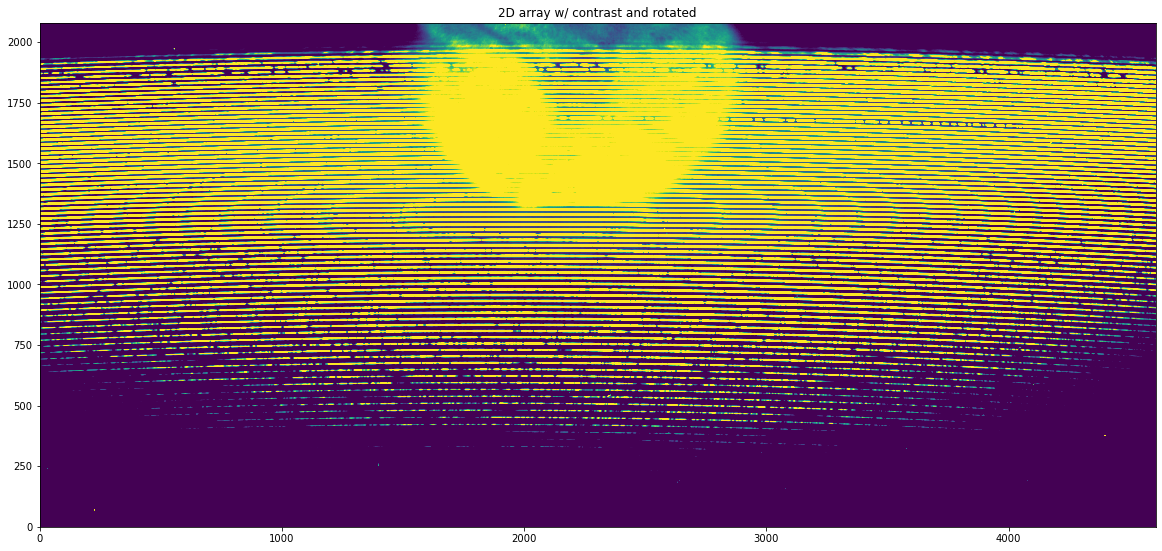

In [56]:
image_rot = np.rot90(image)
plt.figure(figsize=(20,20))
plt.imshow(image_rot, vmin = np.median(image_rot), vmax = np.median(image_rot) * 1.2, origin = 'lower')
plt.title('2D array w/ contrast and rotated')

Now that is a well-defined plot. But it has to match the plot that was on the website. The image would have to be flipped horizontally and Numpy has the function for it: np.fliplr(left and right).

Text(0.5, 1.0, '2D array w/ contrast and rotated AND flipped')

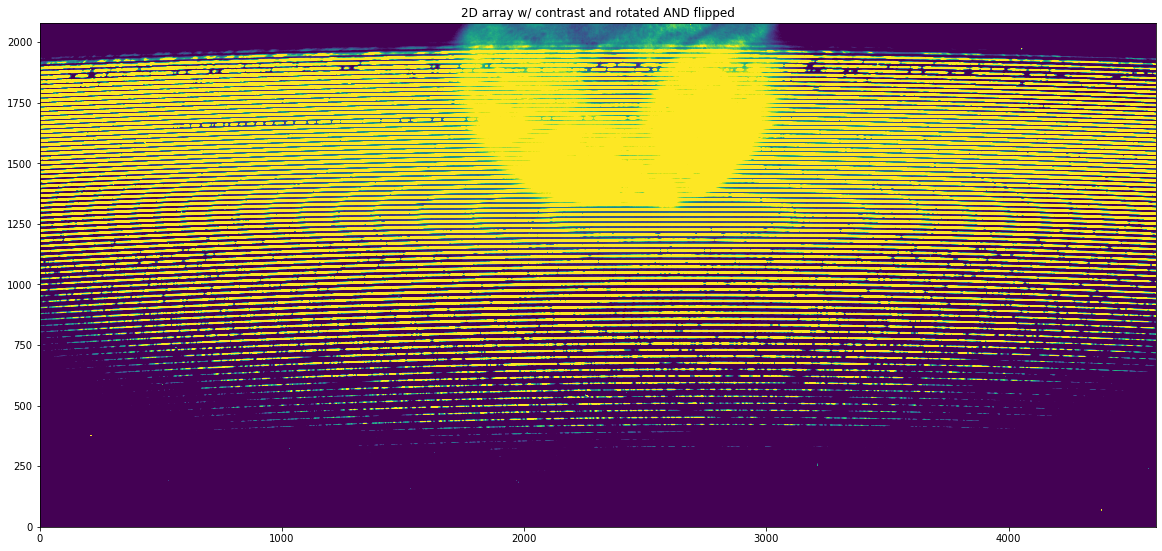

In [57]:
image_flip = np.fliplr(image_rot)
plt.figure(figsize=(20,20))
plt.imshow(image_flip, vmin = np.median(image_flip), vmax = np.median(image_flip) * 1.2, origin = 'lower')
plt.title('2D array w/ contrast and rotated AND flipped')

Now the plot needs to be grayscaled to match the image on the website. The command cmap, or color map, changes the coloring of the image. Set cmap to gray by doing cmap = 'gray'

Text(0.5, 1.0, 'Final 2D array')

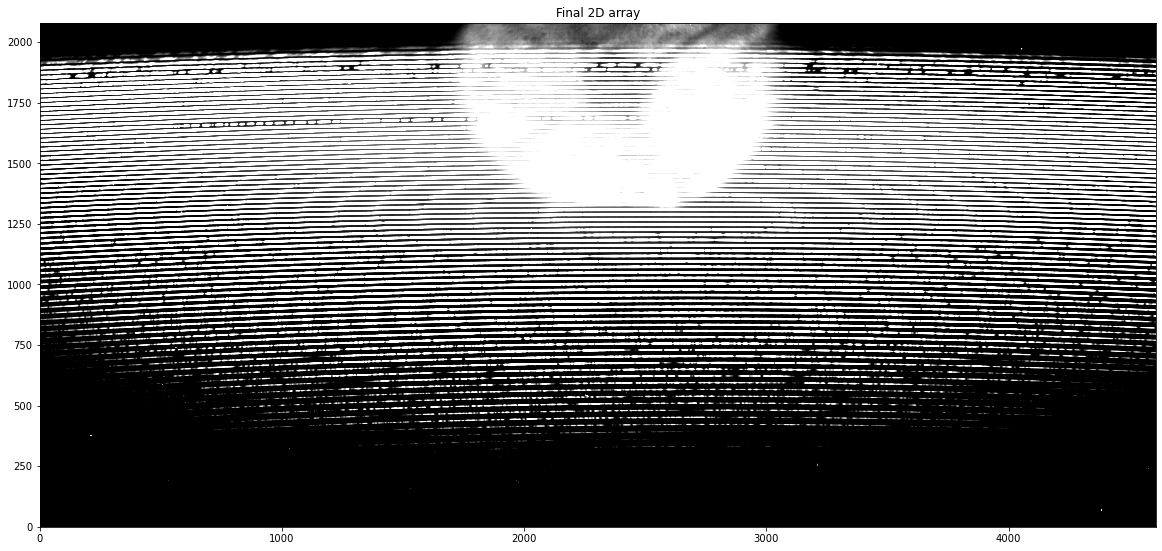

In [58]:
plt.figure(figsize=(20,20))
plt.imshow(image_flip, cmap = 'gray', 
           vmin = np.median(image_flip), vmax = np.median(image_flip) * 1.2, origin = 'lower')
plt.title('Final 2D array')

The patch spans 5 rows vertically (rows 1683 to 1687) and 600 columns across (columns 2200 to 2799). We can show a 2D array of this patch by using the plt.imshow() function with image[1683:1688, 2200:2800], instead of using image. Let's create a new array which is that small patch of the original image.

Text(0.5, 1.0, 'small patch [1683:1688, 2200:2800] of telluric lines')

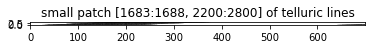

In [13]:
patch = image_flip[1683:1688, 500:1200]
# ^ Cutout of our 2D array, like a patch out of a quilt
plt.imshow(patch, cmap = 'gray', 
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2, origin = 'lower')
plt.title('small patch [1683:1688, 2200:2800] of telluric lines')

If we try to plot it normally then matplotlib is going to make our x-axis 120 times (600 divided by 5) longer than our y-axis, giving us an image with nothing to see.

But we can change this! If we add the parameter aspect = 'auto' into our plt.imshow() function then we our axes will become more similar in size. This will be able to see details in our plot.

Text(0.5, 1.0, 'small patch [1683:1688, 500:2000] of telluric lines')

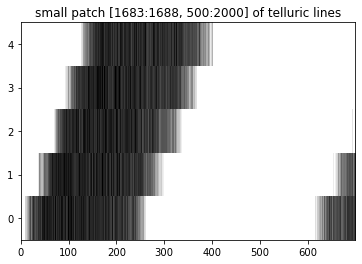

In [14]:
plt.imshow(image_flip[1683:1688, 500:1200], cmap = 'gray', aspect = 'auto', interpolation = 'nearest',
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2, origin = 'lower')
plt.title('small patch [1683:1688, 500:2000] of telluric lines')

In the image above, those dark spots between white spikes are our absorption lines. This patch is 5 pixels tall (1683 to 1687, including 1683) and 600 pixels wide (2200 to 2799, including 2200).

In [15]:
patch = image_flip[1690:1700, 500:1200]
patch.size

7000

Using this patch, we want to plot a 1D array so that we can see a graph of flux vs. pixel. We can do this by summing up all of the columns of patch so that we can obtain an array that is 1x600. To do this, we use the np.sum() function and set our axis equal to '0' (so that it sums columns and not rows).

In [16]:
telluric_1D = np.sum(patch, axis = 0)

With a 1D array, we can get a simpler plot by using the plt.plot() function.

Text(0, 0.5, 'Pixel')

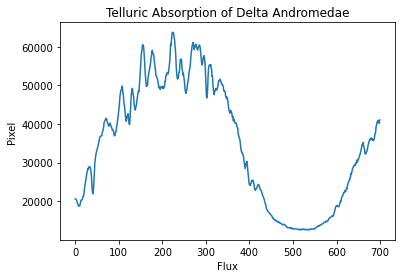

In [17]:
plt.plot(telluric_1D)
plt.title('Telluric Absorption of Delta Andromedae')
plt.xlabel('Flux')
plt.ylabel('Pixel')

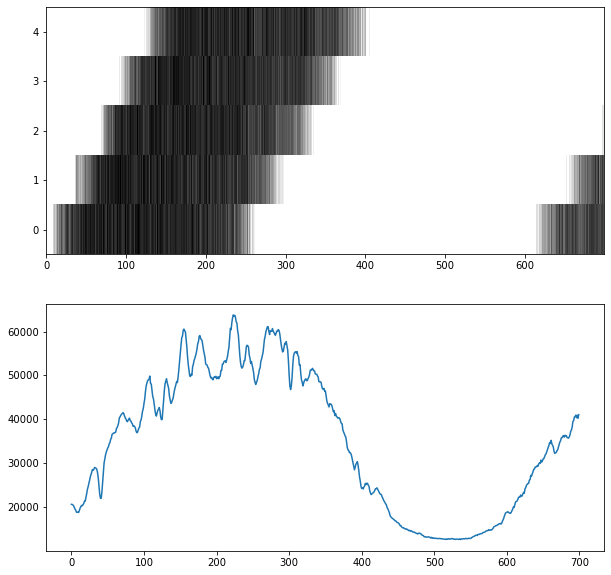

In [18]:
plt.figure(figsize =(10,10))
plt.subplot(2,1,1)
plt.imshow(image_flip[1683:1688,500:1200], cmap = 'gray', aspect = 'auto', 
           interpolation = 'nearest', origin = 'lower',
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2)
plt.subplot(2,1,2)
plt.plot(telluric_1D)

baseline of almost 5500 flux units, but we want the baseline of our graph to have a value 0 flux units. This is due to the flux bias of the APF, and we have to correct for this bias.

A standard practice used to determine the bias is to find the most common pixel value in the rows at the very bottom of our spectrum, and make that the correction value. The rows used to measure the bias do not have any starlight on them. They are called 'overscan' rows. We then subtract the bias value from every pixel in the image in order to correct for the bias.

In [19]:
bias = np.median(image_flip[-30:])
print (bias)

1085.0


Now we can adjust our one-dimensional telluric plot. To do that we need to subract the bias from each order of our array. Since our array is the sum of five orders ([390:395]), we need to subtract the bias five times in order to get a baseline at '0'. Let's call this new array telluric_1D_adj because it has been adjusted to correct for the bias.

Text(0, 0.5, 'Pixel')

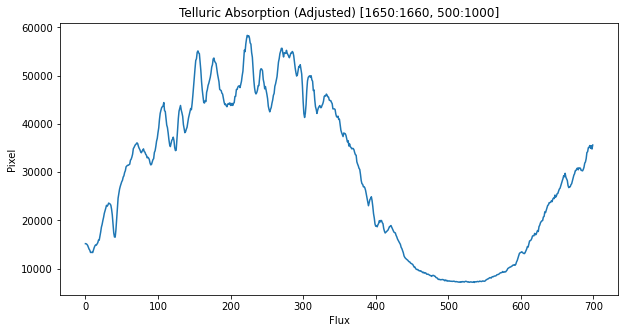

In [20]:
plt.figure(figsize=(10,5))
telluric_1D_adj = telluric_1D - (5*bias)
plt.plot(telluric_1D_adj)
plt.title('Telluric Absorption (Adjusted) [1650:1660, 500:1000]')
plt.xlabel('Flux')
plt.ylabel('Pixel')

In [21]:
os.chdir('/datag/blpd0/datax/apf')
apfdir = '/mnt_home/malikb'

The tutorial is using HIP3092, or Delta Andromedae, a triple star system consisting of three K-type stars. Spectra is taken from order 50, where it includes wavelengths from 5780 to 5860 Angstroms.

In [27]:
star = 'HIP3092(Delta Andromedae)'
Wave_Path = '/mnt_home/malikb/apf_wav.fits'
Flux_Path = '/datag/blpd0/datax/apf/raso.211.fits'

Wave_file = fits.open(Wave_Path)
Flux_file = fits.open(Flux_Path)
Wave_image = Wave_file[0].data
Wave_image = Flux_file[0].data

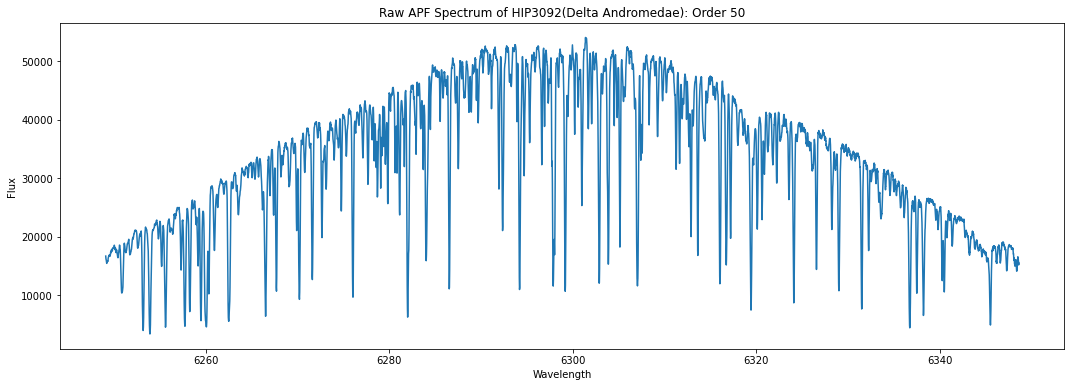

In [33]:
plt.rcParams["figure.figsize"] = (18,6)

order = 50
wave = wl_image[order]
flux = fl_image[order][:-1]
plt.plot(wave,flux)

plt.title('Raw APF Spectrum of ' + star + ': Order ' + str(order))
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.show()

In order to deblaze and normalize the spectrum, the Echelle Blaze function needs to be divided. First divide the data bin into 100 pixels. Then find the flux value within the 95th percentile in each bin and plot those flux values onto the wavelength values. Then divide the APF flux spectrum by the fit of the flux values

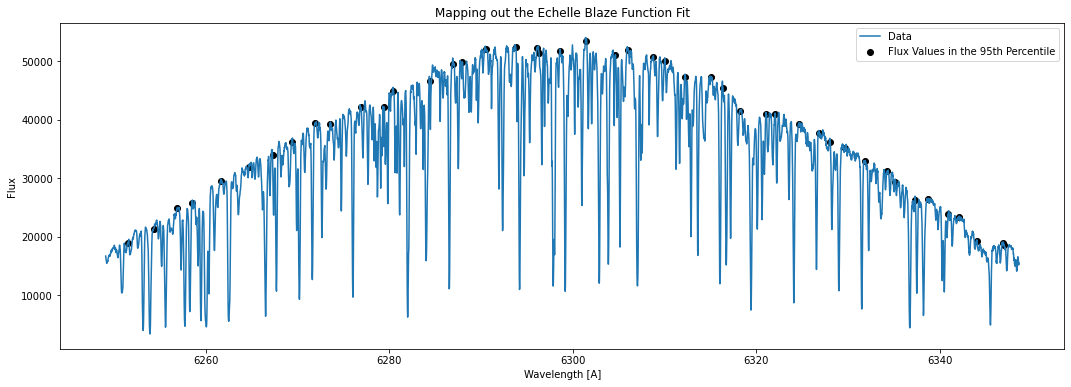

In [35]:

bin = 100

# this list will contain the indices corresponding to each of the 95th percentile flux values in each bin
indices = []

for i in np.arange((len(wave) - (bin)), step = bin):
    flux_values = []
    for j in np.arange(i, i + bin, step = 1):
        value = flux[j]
        flux_values = np.append(flux_values, value)
    # find the 95th percentile flux value: we use 95 to get the maximum flux value in general 
    # but avoid issues with cosmic rays and other emission lines
    flux_in_bin = np.percentile(flux_values, 95)
    # find the closest value in the flux array to the 95th percentile value
    absolute_difference_function = lambda list_value : abs(list_value - flux_in_bin)
    flux_in_bin = min(flux_values.tolist(), key=absolute_difference_function)
    index_in_bin = flux_values.tolist().index(flux_in_bin)
    index = i + index_in_bin
    indices = np.append(indices, index)

# these lists will contain the wavlength and flux values at each index in 'indices'
wave_values = []
flux_values = []

for index in indices:
    ind = int(index)
    wave_values = np.append(wave_values, wave[ind])
    flux_values = np.append(flux_values, flux[ind])
    
plt.plot(wave, flux, label = 'Data')
plt.scatter(wave_values, flux_values, color = 'black', label = 'Flux Values in the 95th Percentile')
plt.title('Mapping out the Echelle Blaze Function Fit')
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.legend()
plt.show()

Now plot the flux values onto the wavelength values so the array length and APF spectrum match.

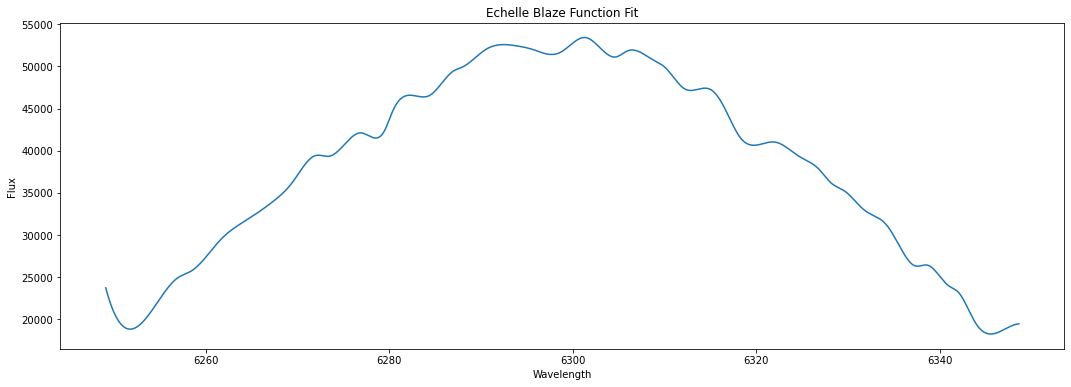

In [43]:
import scipy.interpolate
from scipy.interpolate import splev, splrep
spl = splrep(wave_values, flux_values, s = 500000)
flux_fit = splev(wave, spl)
plt.plot(wave, flux_fit)
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.title('Echelle Blaze Function Fit')
plt.show()

Then we divide the fit from the data.

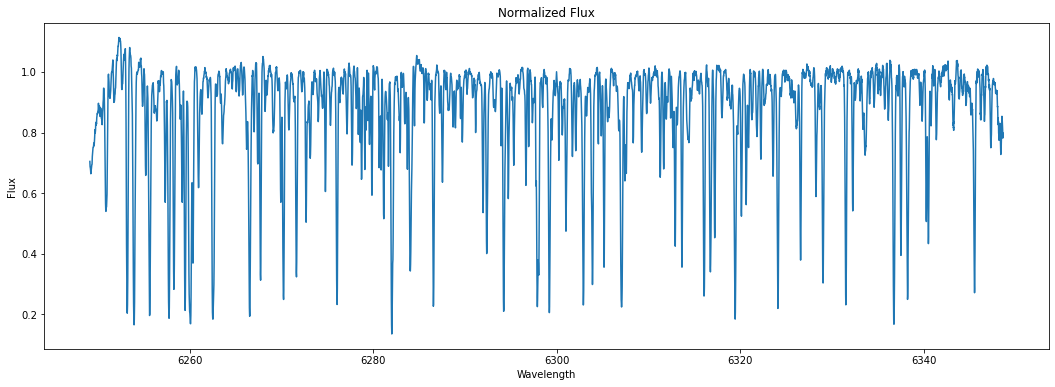

In [38]:
first_normalized_flux = flux / flux_fit
plt.plot(wave, first_normalized_flux)
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.title('Normalized Flux')
plt.show()

However the data isn't fully normalized yet since the values from each bin were drawn from the 95th percentile. Normalization has to be done again by finding the 98th percentile of the data and dividing the data by that value. 

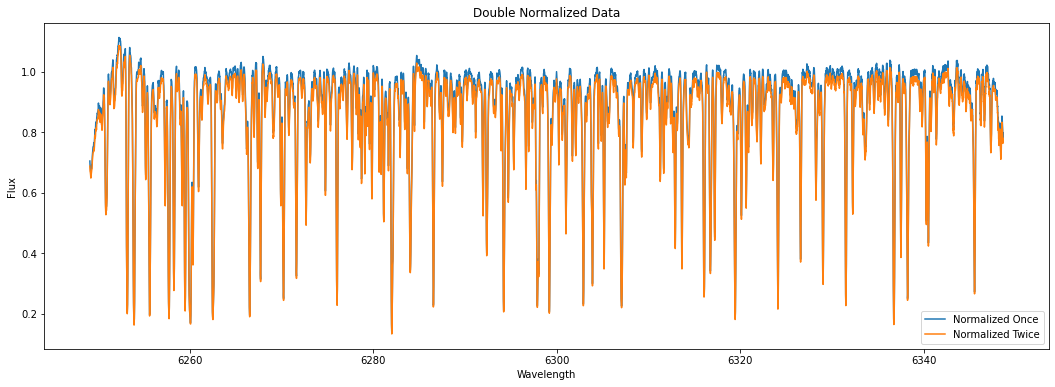

In [44]:
flux98 = np.percentile(first_normalized_flux, 98)
normalized_flux = first_normalized_flux / flux98

plt.plot(wave, first_normalized_flux, label = 'Normalized Once')
plt.plot(wave, normalized_flux, label = 'Normalized Twice')
plt.legend()
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.title('Double Normalized Data')
plt.show()

Now we have a normalized spectrum 

After the brief tutorial on normalizing the APF spectra, we can get back to reducing the APF spectra. 

Now that we've gone through it once, you can try plotting absorption lines for any patch of the spectrum that you want. Let's create a function in Python that will automatically create a patch using any valid coordinates as input, and give it a standard figure size of 10x10. We'll call it cut_n_zoom()

In [45]:
def cut_n_zoom(x1,x2,y1,y2):
    plt.figure(figsize=(10,10))
    plt.imshow(image_flip[x1:x2, y1:y2], cmap = 'gray', aspect = 'auto', 
               vmin = np.median(image), vmax = np.median(image) *1.2, origin = 'lower')
    plt.show()

Now that we have seen some spectral features and plotted a one-dimensional spectrum of the features, let's go find the H-Alpha line. The H-alpha line for this particular .fits file is not very distinct, but is still noticable if we can find the right patch. For an APF data file, the H-alpha line is very often located close to the pixel at index [1509:2049] on the array. Through some trial and error I found that the best patch to cover on image_flip is [1491:1506,1500:2500]. Let's select this patch, take the sums along each column, and subtract the bias to see if we can notice any features. Since we are adding together fifteen pixel values per column we need to subtract fifteen biases from the final array.

In [46]:
#cutting out the patch with the absorption feature
h_alpha_patch = image_flip[1491:1506,1500:2500] 
#take the sum along the columns, and subtract 15 biases
h_alpha_patch_1D_without_bias = np.sum(h_alpha_patch, axis = 0) - bias*15

Text(0, 0.5, 'Pixels')

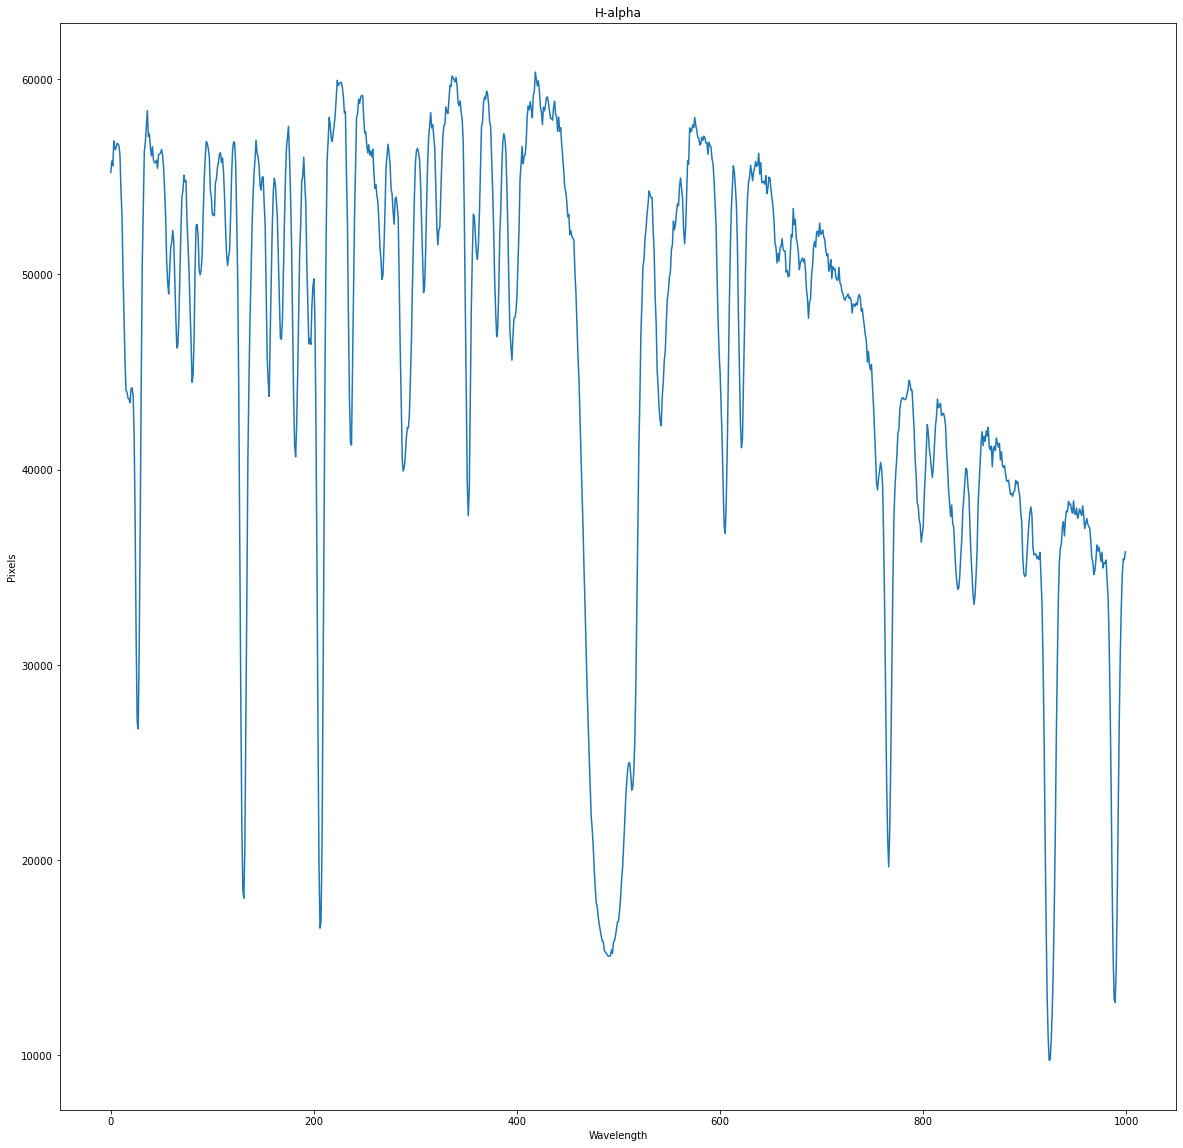

In [66]:
# Plotting H-alpha absorption line
plt.figure(figsize=(20,20))
plt.plot(np.sum(h_alpha_patch, axis = 0) - bias*15)
plt.title('H-alpha')
plt.xlabel('Wavelength')
plt.ylabel('Pixels')

Next, look for some other absorption features and plot them. Let's go for the Sodium-D (Na-D) absorption lines. The patch for the Na-D lines stretches roughly from [1333:1348, 1200:2200]. We can use the exact same process as we did for the Telluric lines, and make a plot of the one-dimensional data which will show the Na-D lines.

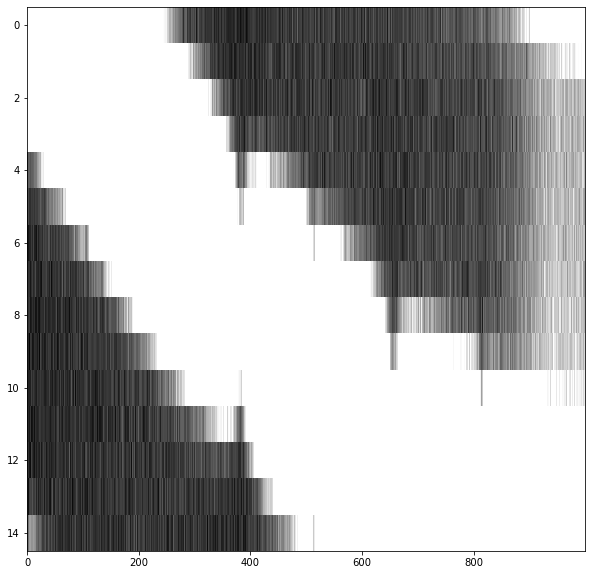

In [48]:
plt.figure(figsize=(10,10))
plt.imshow(image_flip[1333:1348,1200:2200], cmap = 'gray', aspect = 'auto', interpolation = 'nearest',
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2)

Text(0, 0.5, 'Pixels')

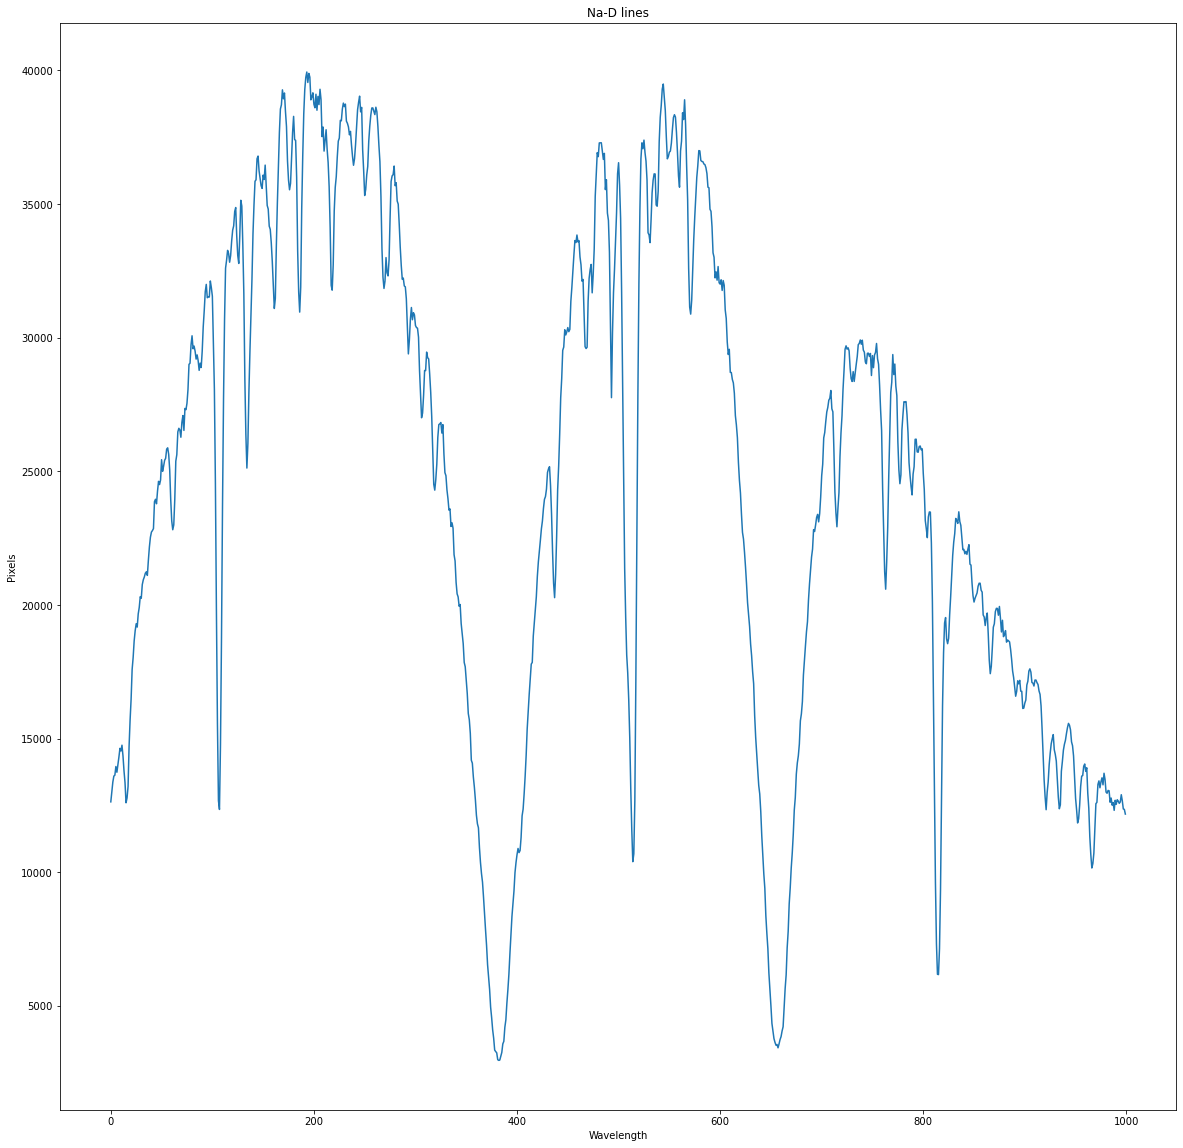

In [65]:
Na_D_patch = image_flip[1333:1348, 1200:2200]
Na_D_patch_1D = np.sum(Na_D_patch, axis = 0) - bias*15
plt.figure(figsize=(20,20))
plt.plot(Na_D_patch_1D)
plt.title('Na-D lines')
plt.xlabel('Wavelength')
plt.ylabel('Pixels')

All of these white lines are actually curved. If I cutout a small patch from the raw data and plot it then the curves look more severe. I can choose any lines to show this, so I'll randomly choose the patch [1650:1750], which is 100 orders vertically and stretches all the way across the array.

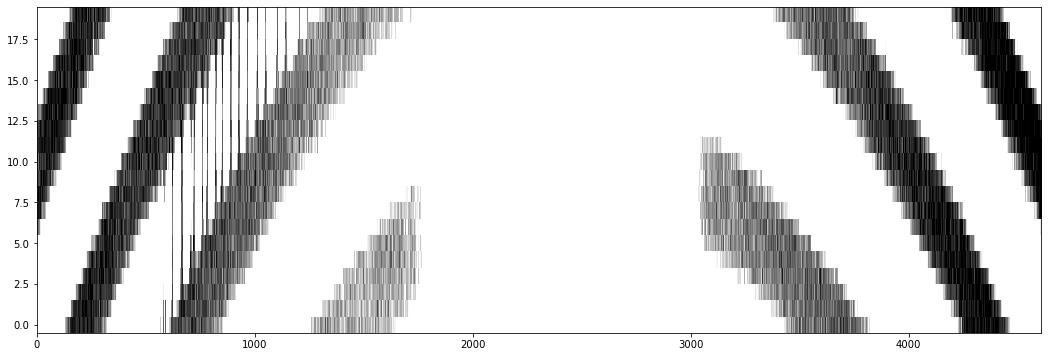

In [50]:
plt.imshow(image_flip[1650:1670], aspect = 'auto', origin = 'lower', cmap = "gray", 
           interpolation = 'nearest', vmin = np.median(image_flip), vmax = np.median(image_flip) *1.1)

The curves are a result of the curved optics used in the telescope being displayed on a flat CCD.

We want to create an image that doesn't have dark spaces between the white lines and that has the lines that are straight instead of curved. We want to create something called a reduced spectrum. The reduced spectrum is rid of the distortions that come from the circular optics used in the telescope, and merges all of the pixel orders together.

A reduced spectrum has already been created from the ucb-amp194.fits file that we have been working with during this tutorial. The .fits file that contains the reduced spectrum is named ramp.194.fits. Notice the difference in the dimensions between the raw data array and the reduced data array.

Text(0.5, 1.0, 'Full Spectrum')

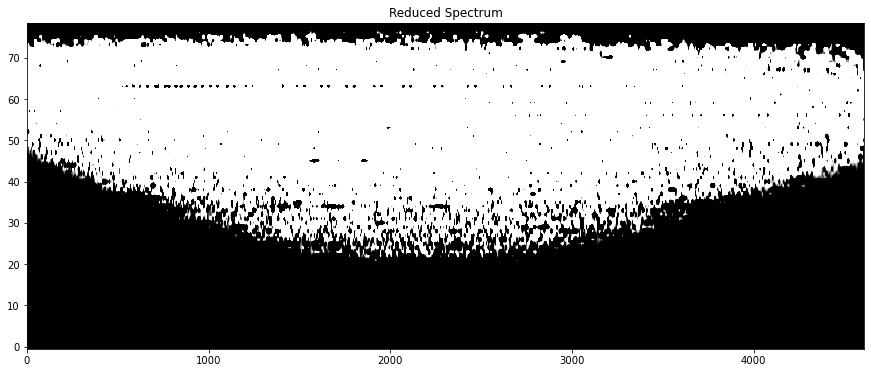

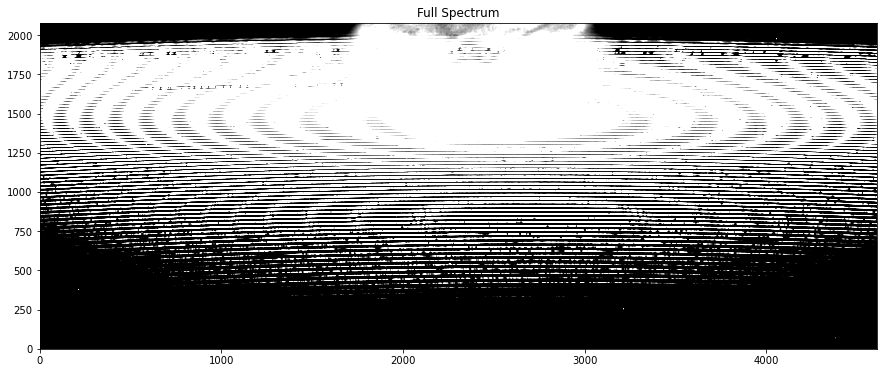

In [64]:
#Load the reduced .fits file and extracting the data
apf_reduced = fits.open('raso.211.fits')
reduced_image_fits = apf_reduced[0].data
#Plot an image of the reduced data
plt.figure(figsize=(15,6))
plt.imshow(reduced_image_fits, cmap = "gray", origin = "lower", aspect = "auto", 
           vmin = np.median(reduced_image_fits), vmax = np.median(reduced_image_fits) *1.1)
plt.title("Reduced Spectrum")
#Plot an image of the raw data
plt.figure(figsize=(15,6))
plt.imshow(image_flip, cmap = "gray", origin = "lower", aspect = "auto", 
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.1)
plt.title("Full Spectrum")

See how the two images have the same length along the the x-axis, but the reduced image has a much smaller range along the y-axis.

If we load the header of this reduced .fits file and print some of its information, we can see that it is consistent with the information in ucb-aso211.fits.

In [52]:
print("Right Ascension: " + header['RA'])
print("Declination: " + header['DEC'])
print("Target Object: " + header['TOBJECT'])
header_reduced = apf_reduced[0].header
print("Reduced - Right Ascension: " + header_reduced['RA'])
print("Reduced - Declination: " + header_reduced['DEC'])
print("Reduced - Target Object: " + header_reduced['TOBJECT'])

Right Ascension:  0:39:19.8
Declination:  30:51:38.0
Target Object: HIP3092
Reduced - Right Ascension:  0:39:19.8
Reduced - Declination:  30:51:38.0
Reduced - Target Object: HIP3092


Now we have normalized and reduced our APF spectra. From this tutorial 